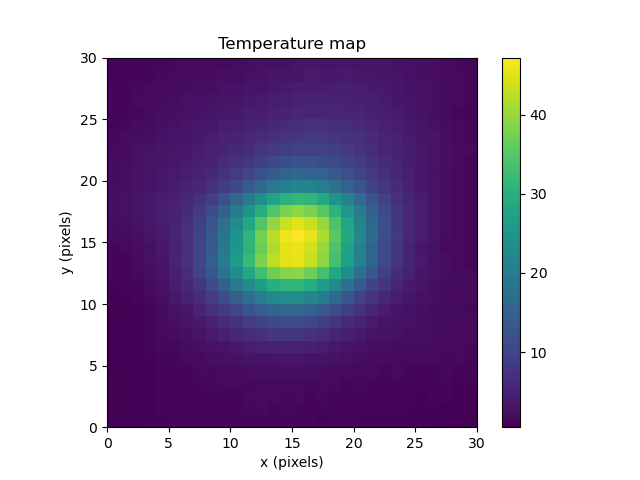

In [1]:

%matplotlib widget
from Code_utilities.SeriesAnalyzer_2 import SeriesAnalyzer_2
from Code_utilities.BeamAnalysis import BeamAnalysis

HIKMICRO_dir_path = (
    #    '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250616/HIKMICRO/Power Series')
    '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/HIKMICRO_PowerSeries')

# x_center_HIKMICRO = 140 - 1
# y_center_HIKMICRO = 107
# width = 30

x_center_HIKMICRO = 152 - 1
y_center_HIKMICRO = 122
width = 30
measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO = 1.05  # .555#
angle_pol_voltage_measurement_HIKMICRO = 90  #70
moved_pol = 'first'
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width / 2, x_center_HIKMICRO + width / 2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width / 2, y_center_HIKMICRO + width / 2)
filename = '50 degrees.csv'

beam_analysis_HIKMICRO = BeamAnalysis(dir_path=HIKMICRO_dir_path,
                                      signal_filename=filename,
                                      camera_name='HIKMICRO',
                                      crop_range_x_pixels=crop_x_range_HIKMICRO,
                                      crop_range_y_pixels=crop_y_range_HIKMICRO)
temperature_array = beam_analysis_HIKMICRO.map_array
fig_HIKMICRO, ax_HIKMICRO = beam_analysis_HIKMICRO.plot_map_in_pixels()
ax_HIKMICRO.set_title('Temperature map')
fig_HIKMICRO.savefig('Temperature_map.pdf')

Moved first polarizer


/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/Scripts/IR_Camera_Beam_Analyzer/DataFitter.py:309: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=fontsize,


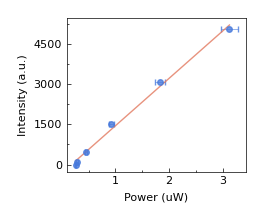

In [11]:
%matplotlib widget
HIKMICRO_SeriesAnalyzer = SeriesAnalyzer_2(dir_path=HIKMICRO_dir_path,
                                           camera_name='HIKMICRO',
                                           Y_ref_position_for_background_subtraction=2,
                                           crop_range_x_pixels=crop_x_range_HIKMICRO,
                                           crop_range_y_pixels=crop_y_range_HIKMICRO)

beam_characterization_df_HIKMICRO = HIKMICRO_SeriesAnalyzer.get_beam_char_df_w_powers(save_data_plot_bool=True,
                                                                            known_angle=angle_pol_voltage_measurement_HIKMICRO,
                                                                            known_voltage_at_known_angle_in_V= measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO,
                                                                            moved_polarizer=moved_pol,)
beam_characterization_df_HIKMICRO

%matplotlib widget
from Code_utilities.DataFitter import DataFitter


fig_fitting_NEC, ax_fitting_NEC = DataFitter().plot_data_with_fit_for_paper(
    x_data=beam_characterization_df_HIKMICRO['Power (uW)'],
    y_data=beam_characterization_df_HIKMICRO['total_intensity'],
    x_label=r'Power (uW)',
    y_label='Intensity (a.u.)',
    title='HIKMICRO',
    camera_name='HIKMICRO',
)
fitting_coefficients_HIKMICRO_all_together=DataFitter().get_fitting_coefficients(x_data=beam_characterization_df_HIKMICRO['Power (uW)'],
                                                                    y_data=beam_characterization_df_HIKMICRO['total_intensity'],)
average_slope_HIKMICRO = fitting_coefficients_HIKMICRO_all_together[0]


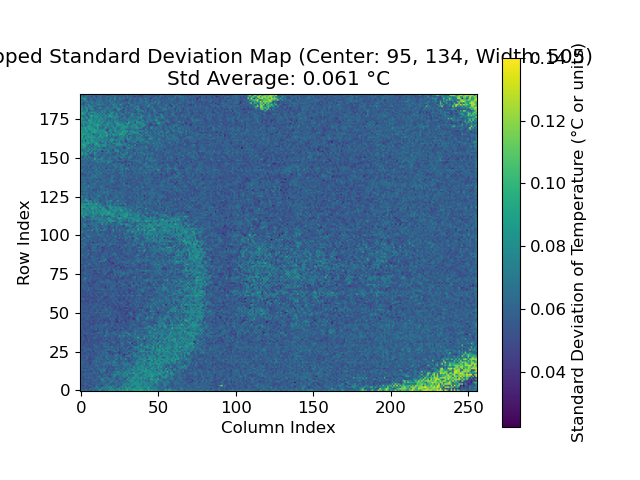

In [3]:
import numpy as np
from Code_utilities.VideoUtilities.VideoAnalyzer import VideoAnalyzer
%matplotlib widget

csv_file_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250508/Noise_Analysis/video_25fps_closed_camera_300frames.csv'
cropping_center_x = 70 + 25
cropping_center_y = 134
cropping_width = 505

# csv_file_path ='/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250508/Noise_Analysis/IR_00002_Temperature Matrix_just300frames.csv'#
# cropping_center_x = 156
# cropping_center_y = 108
# cropping_width = 100


lim_number_of_frames = 309
video_analysis = VideoAnalyzer(csv_path=csv_file_path,
                               lim_number_of_frames=lim_number_of_frames)
fig_copped, ax_cropped, cropped_std_dev_map = video_analysis.plot_std_dev_cropped(crop_width_pixels=cropping_width,
                                                                                  center_x=cropping_center_x,
                                                                                  center_y=cropping_center_y, )
std_average_HIKMICRO = np.mean(cropped_std_dev_map)
fig_copped.savefig('std_dev_map.pdf')

In [4]:
average_NEP_HIKMICRO_uW = std_average_HIKMICRO / average_slope_HIKMICRO
average_NEP_HIKMICRO_uW
uW_to_pW=10**6
average_NEP_HIKMICRO_pW = average_NEP_HIKMICRO_uW * uW_to_pW
average_NEP_HIKMICRO_pW


34.289753755566835

In [5]:
tau_HIKMICRO = 1 / 25
ENBW_HIKMICRO = 1 / (2 * tau_HIKMICRO)
ENBW_HIKMICRO_sqr = ENBW_HIKMICRO ** .5
NEP_HIKMICRO_Hz_sqr = average_NEP_HIKMICRO_pW / ENBW_HIKMICRO_sqr
NEP_HIKMICRO_Hz_sqr

9.698606962311278

loading: 20250616_154518_529_001_10_01_10.csv
loading: 20250616_154536_819_001_10_01_10.csv
loading: 20250616_154543_938_001_10_01_10.csv
loading: 20250616_154520_174_001_10_01_10.csv
loading: 20250616_154543_985_001_10_01_10.csv
loading: 20250616_154540_609_001_10_01_10.csv
loading: 20250616_154542_374_001_10_01_10.csv
loading: 20250616_154537_653_001_10_01_10.csv
loading: 20250616_154531_443_001_10_01_10.csv
loading: 20250616_154543_582_001_10_01_10.csv
loading: 20250616_154525_073_001_10_01_10.csv
loading: 20250616_154537_471_001_10_01_10.csv
loading: 20250616_154531_766_001_10_01_10.csv
loading: 20250616_154540_090_001_10_01_10.csv
loading: 20250616_154539_048_001_10_01_10.csv
loading: 20250616_154539_275_001_10_01_10.csv
loading: 20250616_154539_792_001_10_01_10.csv
loading: 20250616_154541_260_001_10_01_10.csv
loading: 20250616_154537_328_001_10_01_10.csv
loading: 20250616_154541_584_001_10_01_10.csv
loading: 20250616_154531_500_001_10_01_10.csv
loading: 20250616_154542_640_001_1

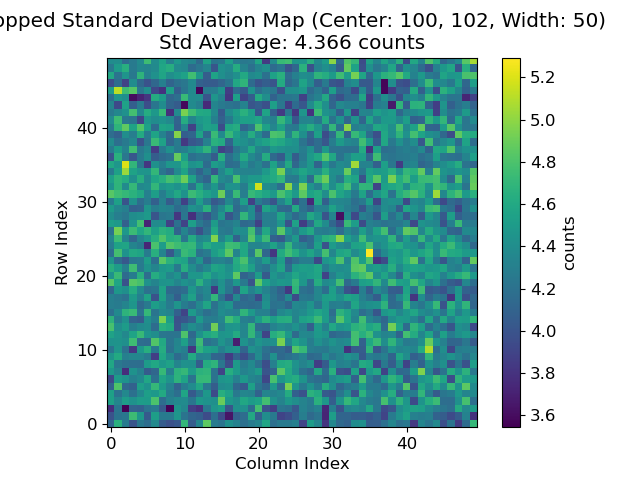

In [6]:
import numpy as np
from Code_utilities.VideoUtilities.VideoAnalyzer_NEC import VideoAnalyzer_NEC
%matplotlib widget
video_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250616/NEC/video'
cropping_center_x = 100
cropping_center_y = 100 + 2
cropping_width = 50
video_analysis = VideoAnalyzer_NEC(video_directory=video_path)
fig_copped, ax_cropped, cropped_std_dev_map = video_analysis.plot_std_dev_cropped(crop_width_pixels=cropping_width,
                                                                                  center_x=cropping_center_x,
                                                                                  center_y=cropping_center_y)
std_average_NEC = np.mean(cropped_std_dev_map)
fig_copped.savefig('std_dev_map.pdf')

In [1]:
%matplotlib widget
from Code_utilities.SeriesAnalyzer_2 import SeriesAnalyzer_2
from Code_utilities.BeamAnalysis import BeamAnalysis

NEC_dir_path = (
    '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/NEC_PowerSeries/all_measurements')

x_center_NEC = 122
y_center_NEC = 223
width = 20
measured_voltage_converted_from_lock_in_to_osciloscope_V_NEC = 1.05
angle_pol_voltage_measurement_NEC = 90
moved_pol = 'first'
crop_x_range_NEC = (x_center_NEC - width / 2, x_center_NEC + width / 2)
crop_y_range_NEC = (y_center_NEC - width / 2, y_center_NEC + width / 2)
filename = '50 degrees.csv'

beam_analysis_NEC = BeamAnalysis(dir_path=NEC_dir_path,
                                 signal_filename=filename,
                                 camera_name='NEC',
                                 crop_range_x_pixels=crop_x_range_NEC,
                                 crop_range_y_pixels=crop_y_range_NEC)
temperature_array = beam_analysis_NEC.map_array
fig_NEC, ax_NEC = beam_analysis_NEC.plot_map_in_pixels()
ax_NEC.set_title('Temperature map')
fig_NEC.savefig('Temperature_map.pdf')

Moved first polarizer


/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/Scripts/IR_Camera_Beam_Analyzer/DataFitter.py:309: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=fontsize,


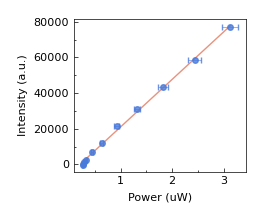

26614.605362203067

In [8]:
%matplotlib widget
NEC_SeriesAnalyzer = SeriesAnalyzer_2(dir_path=NEC_dir_path,
                                      camera_name='NEC',
                                      Y_ref_position_for_background_subtraction=2,
                                      crop_range_x_pixels=crop_x_range_NEC,
                                      crop_range_y_pixels=crop_y_range_NEC)

beam_characterization_df_NEC = NEC_SeriesAnalyzer.get_beam_char_df_w_powers(save_data_plot_bool=True,
                                                                            known_angle=angle_pol_voltage_measurement_NEC,
                                                                            known_voltage_at_known_angle_in_V= measured_voltage_converted_from_lock_in_to_osciloscope_V_NEC,
                                                                            moved_polarizer=moved_pol,)
beam_characterization_df_NEC

%matplotlib widget
from Code_utilities.DataFitter import DataFitter


fig_fitting_NEC, ax_fitting_NEC = DataFitter().plot_data_with_fit_for_paper(
    x_data=beam_characterization_df_NEC['Power (uW)'],
    y_data=beam_characterization_df_NEC['total_intensity'],
    x_label=r'Power (uW)',
    y_label='Intensity (a.u.)',
    title='NEC',
    camera_name='NEC',
)
fitting_coefficients_NEC_all_together=DataFitter().get_fitting_coefficients(x_data=beam_characterization_df_NEC['Power (uW)'],
                                                                    y_data=beam_characterization_df_NEC['total_intensity'],)
average_slope_NEC = fitting_coefficients_NEC_all_together[0]
average_slope_NEC


In [9]:
average_NEP_NEC_uW = std_average_NEC / average_slope_NEC
average_NEP_NEC_uW
uW_to_pW=10**6
average_NEP_NEC_pW = average_NEP_NEC_uW * uW_to_pW
average_NEP_NEC_pW

164.0589679550519

In [10]:
tau_NEC = 1 / 30
ENBW_NEC = 1 / (2 * tau_NEC)
ENBW_NEC_sqr = ENBW_NEC ** .5
NEP_NEC_Hz_sqr = average_NEP_NEC_pW / ENBW_NEC_sqr
NEP_NEC_Hz_sqr

42.359843379059484